In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import random

import scipy
from scipy import stats
from scipy.stats import binom,poisson,norm,t

import pylab
from pylab import legend, plot, show ,title, xlabel, ylabel

import statsmodels
from statsmodels import stats
from statsmodels.stats import weightstats as ssw

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp

from statsmodels.stats import proportion as ssp

from scipy.stats import chisquare, chi2_contingency

In [73]:
df=pd.read_excel('CDAC_DataBook.xlsx',sheet_name='stackloss')


In [74]:
df.head()

,AirFlow,WaterTemp,AcidConc,StackLoss
0,80,27,89,42
1,80,27,88,37
2,75,25,90,37
3,62,24,87,28
4,62,22,87,18


In [75]:
df.corr()

,AirFlow,WaterTemp,AcidConc,StackLoss
AirFlow,1.000000,0.781852,0.500143,0.919663
WaterTemp,0.781852,1.000000,0.390940,0.875504
AcidConc,0.500143,0.390940,1.000000,0.399830
StackLoss,0.919663,0.875504,0.399830,1.000000


In [76]:
np.cov(df.AirFlow,df.WaterTemp)   

array([[84.05714286, 22.65714286],
       [22.65714286,  9.99047619]])

[[airflow with airflow,airflow with watertemp], <br>
[watertemp with airflow, watertemp with watertemp]]   - covarience

In [77]:
np.var(df.AirFlow)

np.float64(80.05442176870748)

variance(var) will be approxiamtely equal to covarience (var) with itself
covarience tells if the correlation is positive or negative.

In [78]:
np.var(df.AirFlow)

np.float64(80.05442176870748)

In [79]:
np.var(df.WaterTemp)

np.float64(9.514739229024945)

In [80]:
np.corrcoef(df.AirFlow,df.WaterTemp)


array([[1.        , 0.78185233],
       [0.78185233, 1.        ]])

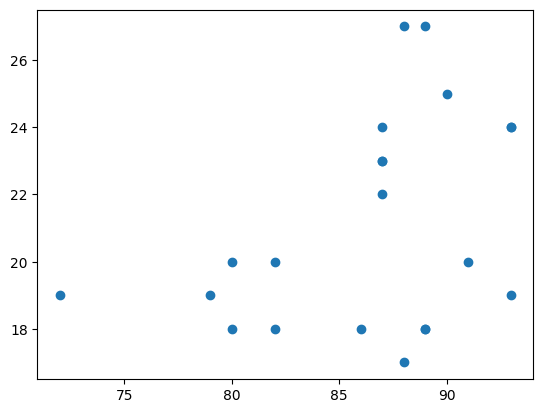

In [81]:
plt.scatter(df.AcidConc,df.WaterTemp)


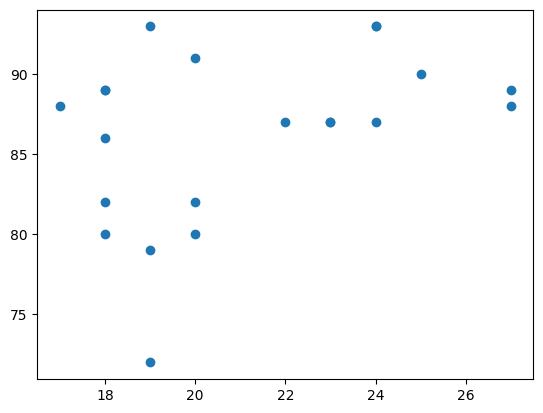

In [82]:
plt.scatter(df.WaterTemp,df.AcidConc)


In [83]:
df=pd.read_excel('CDAC_DataBook.xlsx',sheet_name='faithful')

In [84]:
df.head()
# np.min(df.waiting)

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


(-10.0, 20.0)

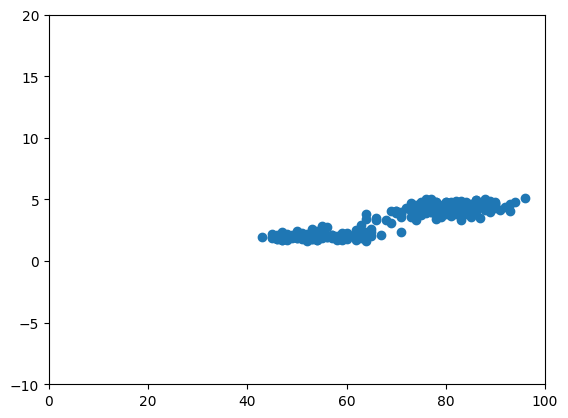

In [85]:
plt.scatter(df.waiting,df.eruptions)
# plt.scatter(df.eruptions,df.waiting)

plt.xlim([0,100])
plt.ylim([-10,20])

## correlation coefficient only tells about linear relation between x and y.


In [86]:
np.corrcoef(df.waiting,df.eruptions)

array([[1.        , 0.90081117],
       [0.90081117, 1.        ]])

# Occam's Razor-
- is a principle that likes simplicity. It says that the simplest solution is usually the best one.

In [87]:
df=pd.read_excel('CDAC_DataBook.xlsx',sheet_name='faithful')

In [88]:
x_train=df.waiting
y_train=df.eruptions

In [89]:
x_train

0      79
1      54
2      74
3      62
4      85
       ..
267    81
268    46
269    90
270    46
271    74
Name: waiting, Length: 272, dtype: int64

In [90]:
x_train=sm.add_constant(x_train,prepend=False)

In [91]:
x_train

,waiting,const
0,79,1.0
1,54,1.0
2,74,1.0
3,62,1.0
4,85,1.0
...,...,...
267,81,1.0
268,46,1.0
269,90,1.0
270,46,1.0


In [92]:
mod1=sm.OLS(y_train,x_train).fit() #Ordinary Least squared

In [93]:
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:              eruptions   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Tue, 17 Dec 2024   Prob (F-statistic):          8.13e-100
Time:                        23:42:35   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
waiting        0.0756      0.002     34.089      0.0

m=waiting        0.0756<br>
c=const         -1.8740  

Null hypothesis is that model is useless<br>
p-value = (0.9*(10**-8) <0.05<br>
Hence model is useful

R -> coefficient of determination
In case of **simple linear regression** -> R(coefficient of determination) is squared of correlation coefficient

It means that 81.1% of the total variation is explained by the model.

Adjusted r-squared charges(levies) a penalty for excess number of predictors(more than 1) in the model and will always be less than the R-squared value.<br>
As the number of predictors increase, the difference between r and r-squared adjusted will also increase.<br><br>
Extra -formula-<br>
1-[((1-R**2)*(n-1))/(n-k-1)]<br>
k=number of predictors<br>
n=rows

null hypothesis is that the response does not depend on the value of m , that is m=0  <br>
ho(m): m=0

null hypothesis is that the response does not depend on the value of c , that is c=0  <br>
ho(c): c=0

the difference between 0 and 0.0756(m) is statistically significant. We reject the null hypothesis

.025 and 0.975 -> is the interval(95%) in which our value will fall. Values beyond these will be rejected.

here in this case it(m value - 0.0756) is between  0.071 and 0.080



Multi collinearity-
- two or more input factors have high correlation coefficients.

# Hypothesis testing-
Establish the null (Ho) and the alternative hypothesis (Ha/ H1) Null hypothesis is made in such a way that if it is found to be true then-<br>
a. no action is needed<br>
b. no decision is required<br>
c. no changes are required<br>
d. maintain status quo<br>